# Image Processing

Imager is for image processing

In [1]:
# install.packages("imager")

 If install fails on a mac, you may need to install Xcode

 If install fails on linux, you may need to install limx11-dev, g++, r-cran-cairo, libfftw3-dev

In [2]:
#install.packages("magick")

If installation fails on linux, may require libmagick++-dev or ImageMagick-c++-devel libraries

In [3]:
library(magick)
library(imager)

Linking to ImageMagick 6.9.7.4
Enabled features: fontconfig, freetype, fftw, lcms, pango, x11
Disabled features: cairo, ghostscript, rsvg, webp
Loading required package: magrittr

Attaching package: ‘imager’

The following object is masked from ‘package:magrittr’:

    add

The following objects are masked from ‘package:stats’:

    convolve, spectrum

The following object is masked from ‘package:graphics’:

    frame

The following object is masked from ‘package:base’:

    save.image



In [4]:
soda.pop=load.image("../pix/cokepepsi.jpg")

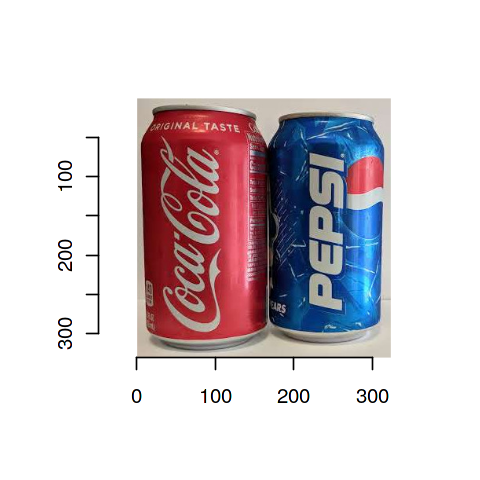

In [5]:
options(repr.plot.width=4, repr.plot.height=4)

#pdf("soda-pop-plot.pdf")
plot(soda.pop)
#dev.off()

## One thing to notice about image processing is that the y axis origin is at the upper left hand corner and increases going down!

## This is standard in all image processing applications, in all computer languages

## the y coordinate really means "row", analogous to row of a matrix

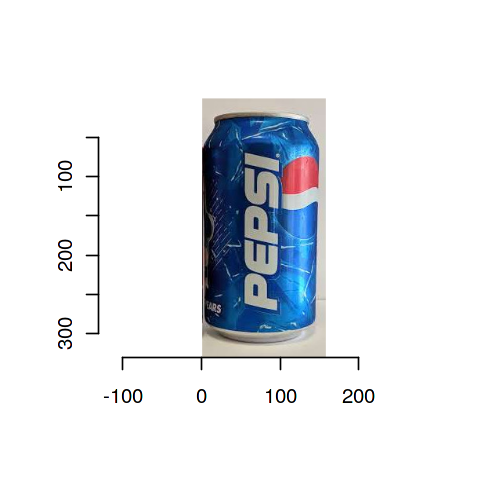

In [6]:
pepsi=imsub(soda.pop, x>165)
#pdf("pepsi-plot.pdf")
plot(pepsi)
#dev.off()

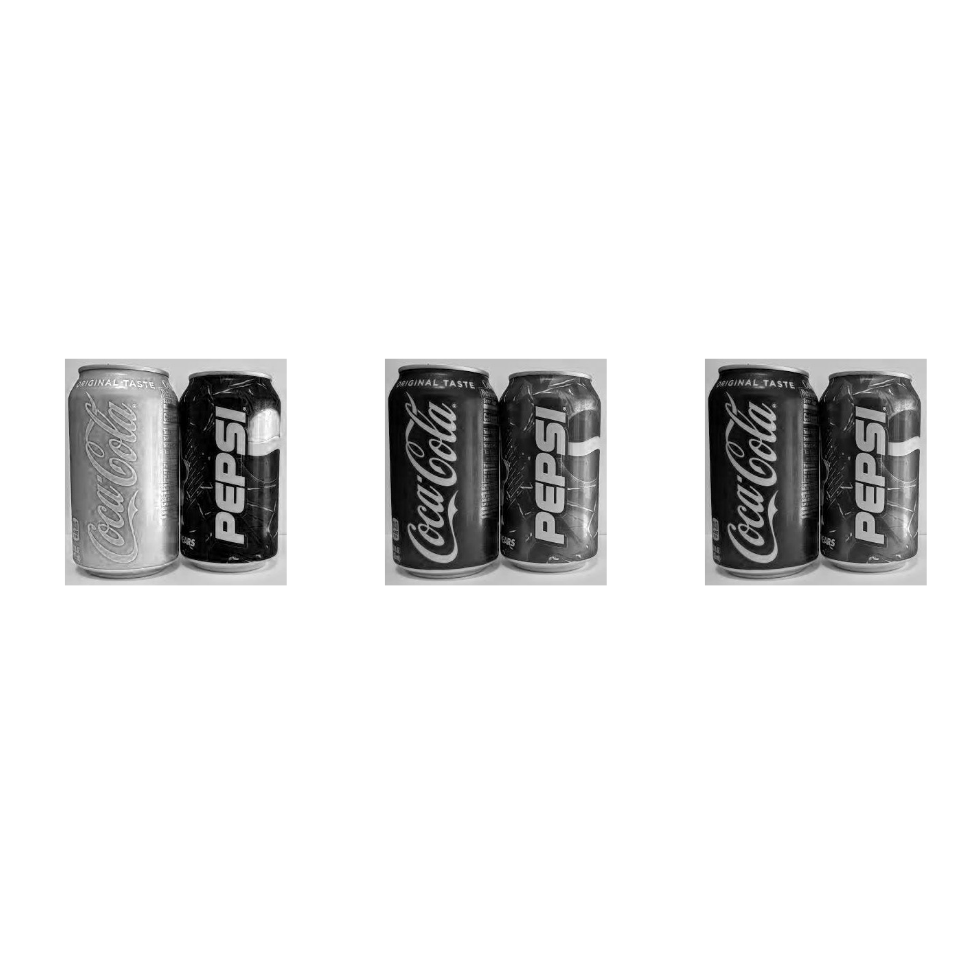

In [7]:
red=R(soda.pop); green=G(soda.pop); blue=G(soda.pop)
options(repr.plot.width=8, repr.plot.height=8)
#pdf("RGB-soda-pdf.pdf")
par(mfcol=c(1,3))
plot(red, axes=FALSE)
plot(green, axes=FALSE)
plot(blue, axes=FALSE)
#dev.off()

In [8]:
hollywood=grayscale(load.image("../pix/hollywood.jpg"))
dim(hollywood)

[1] 1666  761    1    1

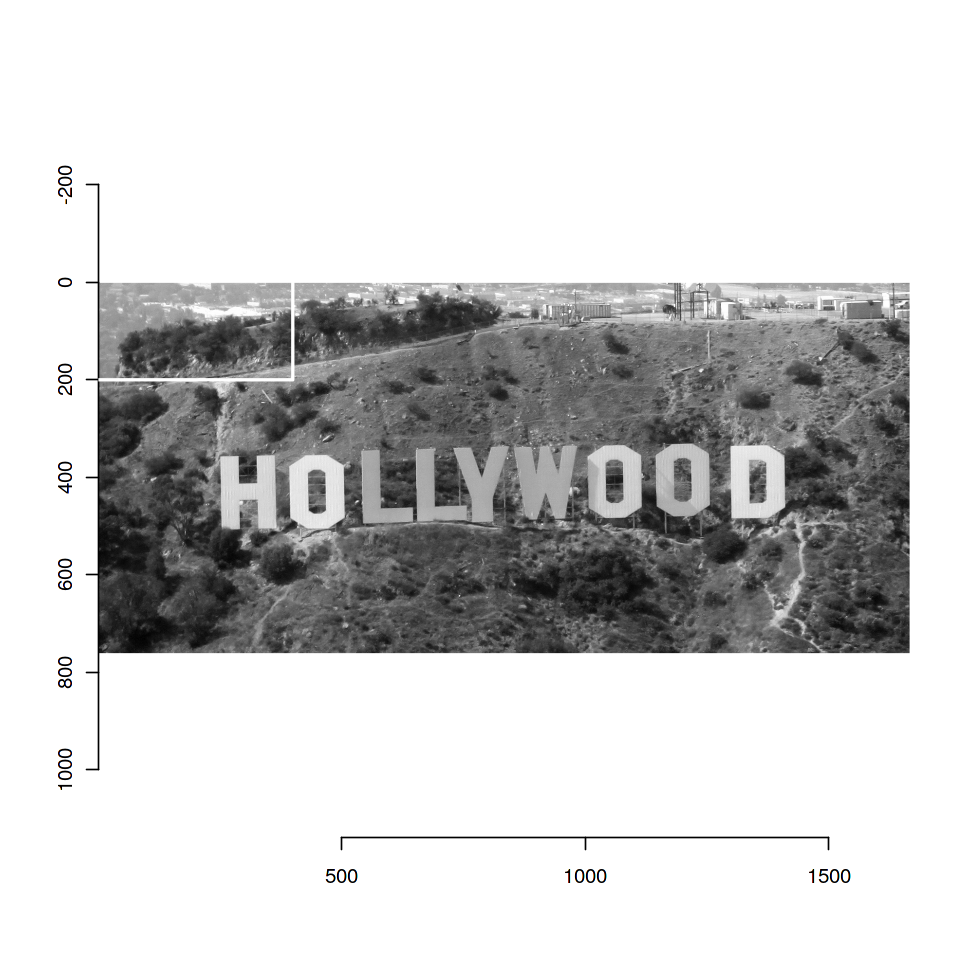

In [9]:
hollywood=grayscale(load.image("../pix/hollywood.jpg"))
#pdf("hollywood.pdf")
plot(hollywood)#, axes=FALSE)
lines(c(0,400,400),c(200,200,0),col="white",lwd=2)
#dev.off()

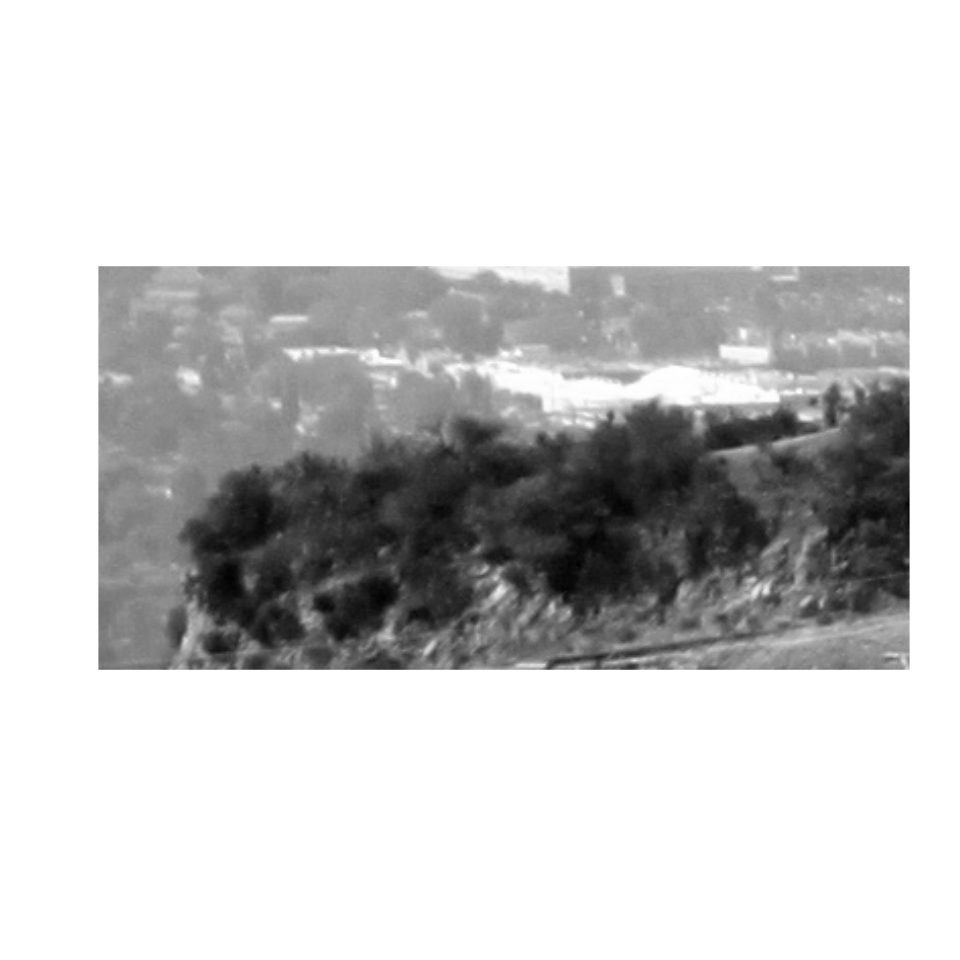

In [10]:
hollywood.ULC=imsub(hollywood, x<400, y<200)
#pdf("hollywood-ULC.pdf")
plot(hollywood.ULC,axes=FALSE)
#dev.off()

## histogram equalization

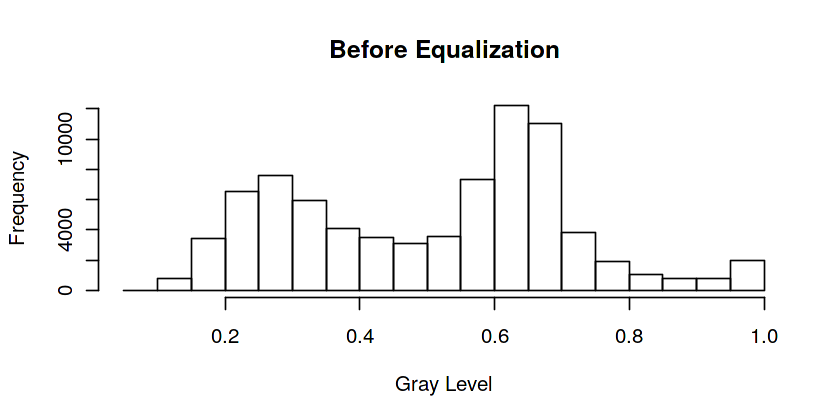

In [11]:
options(repr.plot.width=7, repr.plot.height=3.5)
#
#pdf("hollywood-histogram.pdf", width=7, height=3.5)
hist(hollywood.ULC, main="Before Equalization", xlab="Gray Level")
#dev.off()

## We can use R's built in empirical cumulative distribution function to flatten the histogram so that all channels are used equally
## $$F_n(t) =\dfrac{ |\{x_i | x_i < t\}| }{n}$$

In [12]:
f=ecdf(hollywood.ULC) # defines a function

### f (image) will return a linear vector; need to turn int back into an image

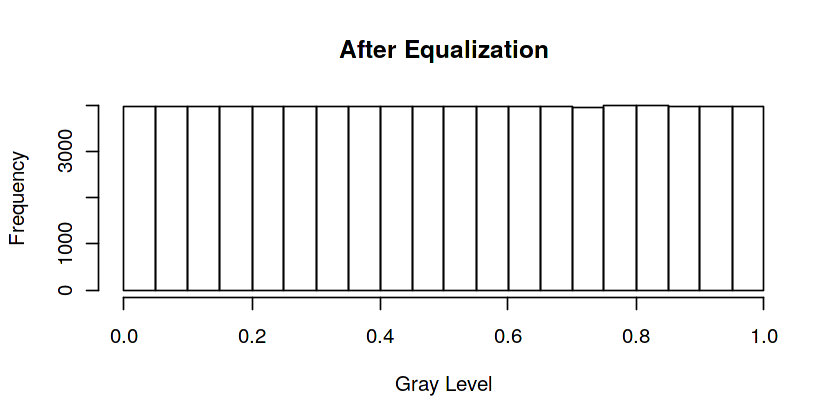

In [13]:
holly=as.cimg(f(hollywood.ULC), dim=dim(hollywood.ULC))
#pdf("hollywood-histogram-eq.pdf", width=7, height=3.5)
hist(holly, main="After Equalization", xlab="Gray Level")
#dev.off()

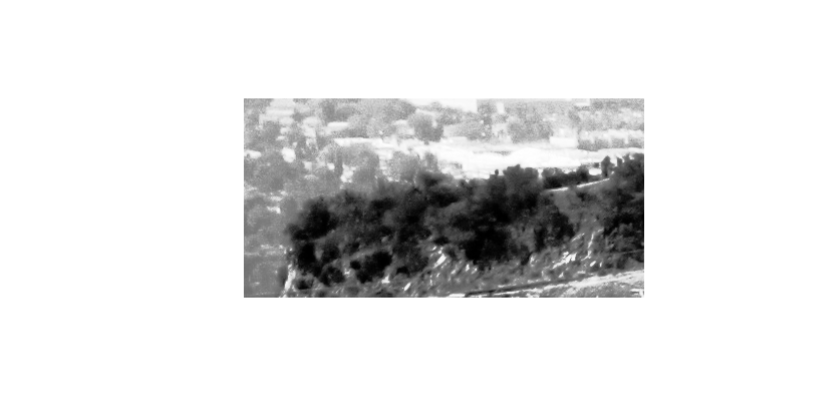

In [14]:
#pdf("hollywood-ULC-eq.pdf")
plot(holly,axes=FALSE)
#dev.off()

# Filtering

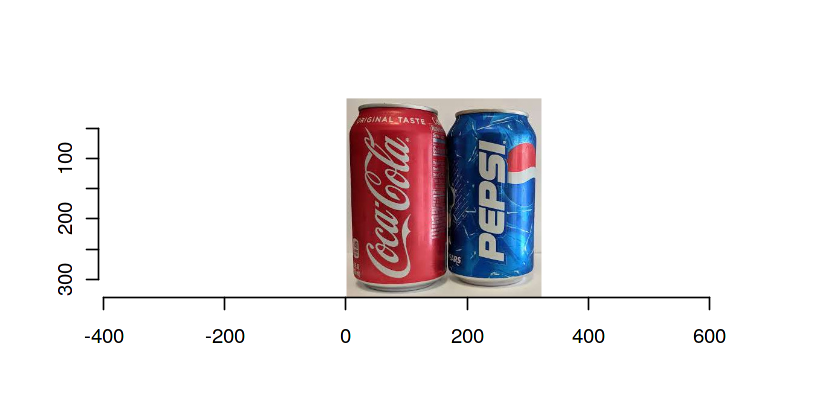

In [15]:
plot(soda.pop)

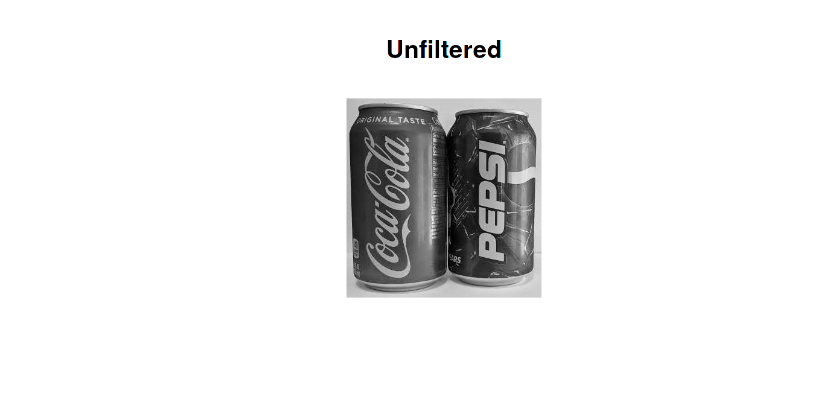

In [16]:
G=grayscale(soda.pop)
K1 = as.cimg(matrix(1,7,7))
#G %>% correlate(K1) %>% plot(axes=FALSE)
IG=correlate(G, K1)
plot(G, axes=FALSE, main="Unfiltered")

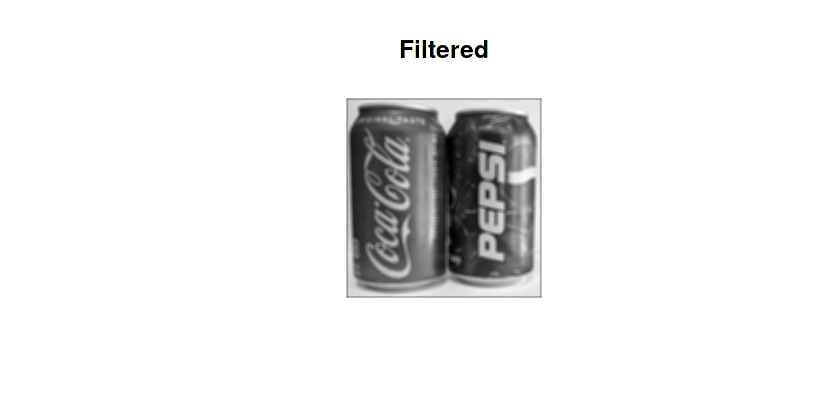

In [17]:
plot(IG, axes=FALSE, main = "Filtered")

# Thresholding

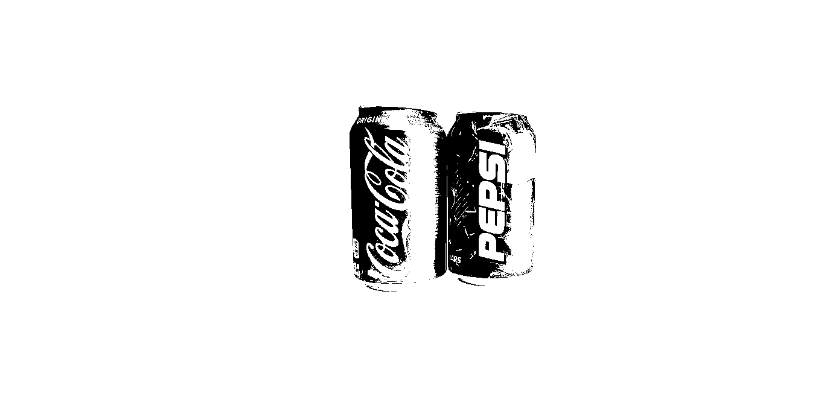

In [18]:
#pdf("soda-pop-threshold-point3.pdf")
threshold(G, .3) %>% plot(axes=FALSE)
#dev.off()

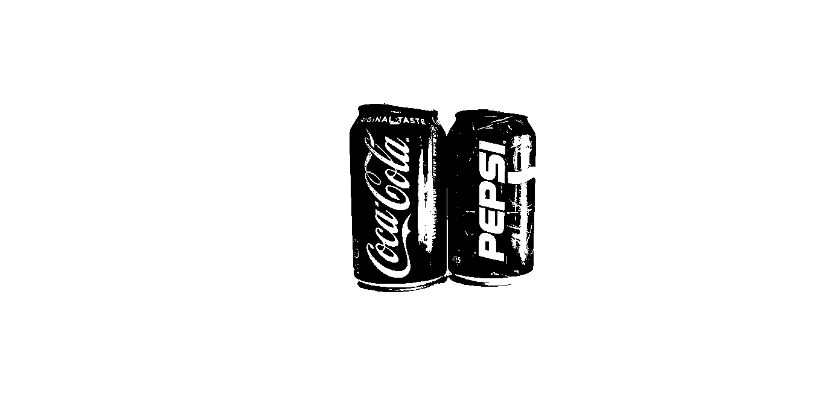

In [19]:
#pdf("soda-pop-threshold-point5.pdf")
threshold(G, .5) %>% plot(axes=FALSE)
#dev.off()

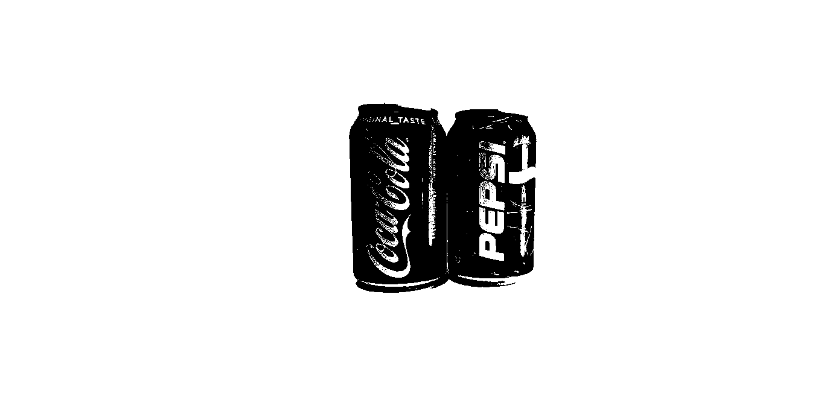

In [20]:
#pdf("soda-pop-threshold-point6.pdf")
threshold(G, .6) %>% plot(axes=FALSE)
#dev.off()

# Edge Detection Filters

In [146]:
x.axis=matrix(c(1,1,1,-2,-2,-2,1,1,1), nrow=3)
y.axis=t(x.axis)
double.diagonal=matrix(c(1,0,1,0,-4,0,1,0,1),nrow=3)
both.axes=matrix(c(0,1,0,1,-4,1,0,1,0),nrow=3)
lap=matrix(c(1,1,1,1,-8,1,1,1,1),nrow=3)

## save graylevel image as jpg

In [160]:
soda.pop=load.image("../pix/cokepepsi.jpg")
G.soda.pop=grayscale(soda.pop)
save.image(G.soda.pop,"cokepepsi-gray.jpg",quality=.9)

## read using magick rather than imager

In [161]:
G=image_read("cokepepsi-gray.jpg")

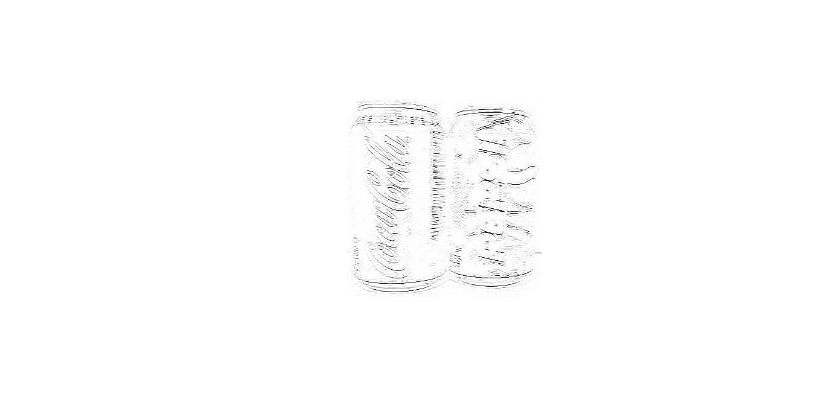

In [174]:
#pdf("soda-x-filter.pdf")
image_convolve(G,x.axis) %>% image_negate %>% plot()
#dev.off()

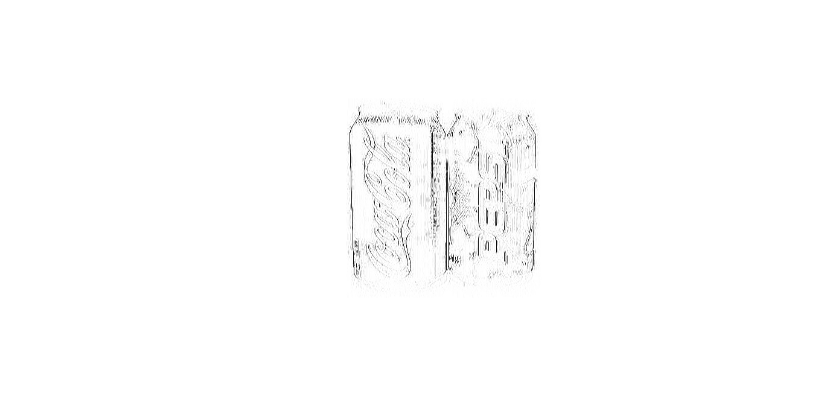

In [177]:
#pdf("soda-y-filter.pdf")
image_convolve(G,y.axis) %>% image_negate %>% plot()
#dev.off()

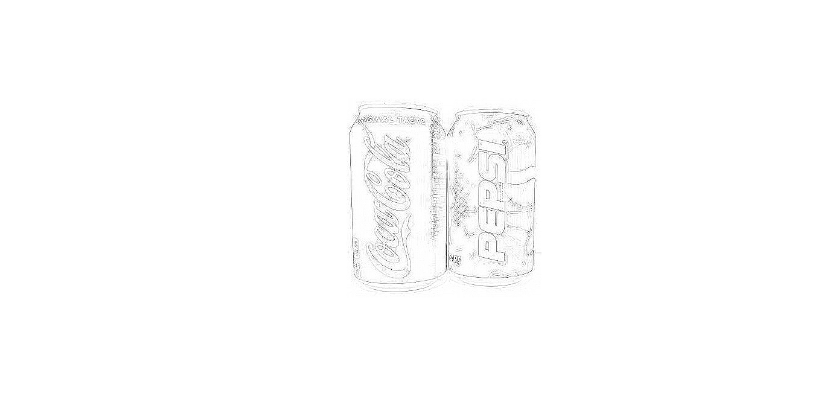

In [184]:
#pdf("soda-xy-filter.pdf")
image_convolve(G,both.axes) %>% image_negate %>% plot()
#dev.off()

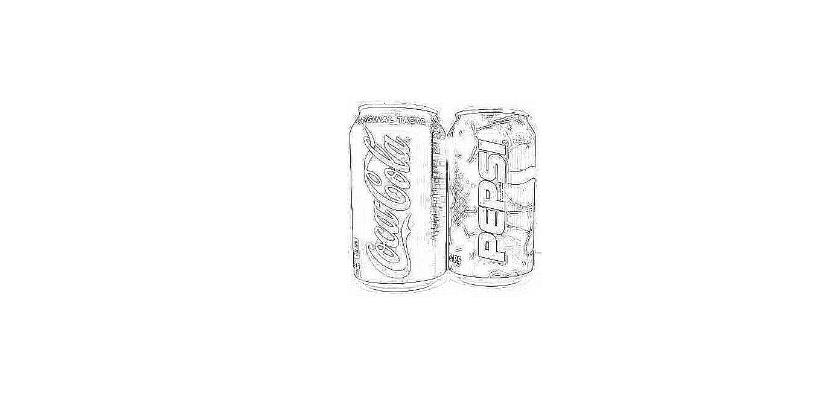

In [182]:
#pdf("soda-lap-filter.pdf")
image_convolve(G,lap) %>% image_negate %>% plot()
#dev.off()